In [9]:
!pip install soccerdata

In [10]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

In [11]:
sd.FBref.available_leagues()

['Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [12]:
fbref = sd.FBref(leagues="Big 5 European Leagues Combined", seasons=2425)
print(fbref.__doc__)

[06/07/25 21:19:48] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=569217;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=773546;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [13]:
# 1 - Join player_season_misc + player_season_std
 #por nome ou idade

# Filtrar jogadores com pelo menos 600 minutos jogados

# Remover goleiros (GK), Meias (MF) e Atacantes (FW)

#2- Selecionar as colunas   ('Playing Time', 'Min'),
#    ('Progression', 'PrgC'),
#    ('Progression', 'PrgP')
#    ('Aerial Duels', 'Won%'),
#    ('Aerial Duels', 'Won'),
#    ('Aerial Duels', 'Lost')
#     Fls
#   Defensive Action Tkl,TklW (%),Err,Int


In [14]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

[06/07/25 21:19:55] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=322098;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=748732;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born  \
                                                                          
league             season team    player                                  
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997   
                                  Bukayo Saka      ENG  FW,MF  22  2001   
                                  David Raya       ESP     GK  28  1995   
                                  Declan Rice      ENG     MF  25  1999   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   

                                                Playing Time               \
                                                          MP Starts   Min   
league             season team    player                                    
ENG-Premier League 2425   Arsenal Ben White               17     13  1198   
                                  Bukayo Saka             25     20  1729   
                                  David Raya              38     38  3420   
                                  Declan Rice             35     33  2825   
                                  Ethan Nwaneri           26     11   895   

                                                      Performance      ...  \
                                                  90s         Gls Ast  ...   
league             season team    player                               ...   
ENG-Premier League 2425   Arsenal Ben White      13.3           0   2  ...   
                                  Bukayo Saka    19.2           6  10  ...   
                                  David Raya     38.0           0   0  ...   
                                  Declan Rice    31.4           4   7  ...   
                                  Ethan Nwaneri   9.9           4   2  ...   

                                                Per 90 Minutes              \
                                                           Gls   Ast   G+A   
league             season team    player                                     
ENG-Premier League 2425   Arsenal Ben White                0.0  0.15  0.15   
                                  Bukayo Saka             0.31  0.52  0.83   
                                  David Raya               0.0   0.0   0.0   
                                  Declan Rice             0.13  0.22  0.35   
                                  Ethan Nwaneri            0.4   0.2   0.6   

                                                                          \
                                                 G-PK G+A-PK    xG   xAG   
league             season team    player                                   
ENG-Premier League 2425   Arsenal Ben White       0.0   0.15  0.03   0.1   
                                  Bukayo Saka    0.26   0.78  0.36   0.4   
                                  David Raya      0.0    0.0   0.0   0.0   
                                  Declan Rice    0.13   0.35  0.11  0.21   
                                  Ethan Nwaneri   0.4    0.6  0.12  0.12   

                                                                       
                                                xG+xAG  npxG npxG+xAG  
league             season team    player                               
ENG-Premier League 2425   Arsenal Ben White       0.14  0.03     0.14  
                                  Bukayo Saka     0.75  0.31     0.71  
                                  David Raya       0.0   0.0      0.0  
                                  Declan Rice     0.32  0.11     0.32  
                                  Ethan Nwaneri   0.24  0.12     0.24  

[5 rows x 33 columns]

In [15]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

  Playing Time         ... Per 90 Minutes                                 \
            MP Starts  ...            Gls   Ast   G+A  G-PK G+A-PK    xG   
0           17     13  ...            0.0  0.15  0.15   0.0   0.15  0.03   
1           25     20  ...           0.31  0.52  0.83  0.26   0.78  0.36   
2           38     38  ...            0.0   0.0   0.0   0.0    0.0   0.0   
3           35     33  ...           0.13  0.22  0.35  0.13   0.35  0.11   
4           26     11  ...            0.4   0.2   0.6   0.4    0.6  0.12   

                               
    xAG xG+xAG  npxG npxG+xAG  
0   0.1   0.14  0.03     0.14  
1   0.4   0.75  0.31     0.71  
2   0.0    0.0   0.0      0.0  
3  0.21   0.32  0.11     0.32  
4  0.12   0.24  0.12     0.24  

[5 rows x 37 columns]

In [16]:
player_season_gk = fbref.read_player_season_stats(stat_type="keeper")
player_season_gk.head()

[06/07/25 21:20:12] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=488738;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=795053;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation pos age  born  \
                                                                               
league             season team        player                                   
ENG-Premier League 2425   Arsenal     David Raya           ESP  GK  28  1995   
                          Aston Villa Emiliano Martínez    ARG  GK  31  1992   
                                      Robin Olsen          SWE  GK  34  1990   
                          Bournemouth Kepa Arrizabalaga    ESP  GK  29  1994   
                                      Mark Travers         IRL  GK  25  1999   

                                                        Playing Time         \
                                                                  MP Starts   
league             season team        player                                  
ENG-Premier League 2425   Arsenal     David Raya                  38     38   
                          Aston Villa Emiliano Martínez           37     37   
                                      Robin Olsen                  4      1   
                          Bournemouth Kepa Arrizabalaga           31     31   
                                      Mark Travers                 5      5   

                                                                90s  \
                                                          Min         
league             season team        player                          
ENG-Premier League 2425   Arsenal     David Raya         3420  38.0   
                          Aston Villa Emiliano Martínez  3194  35.5   
                                      Robin Olsen         226   2.5   
                          Bournemouth Kepa Arrizabalaga  2790  31.0   
                                      Mark Travers        450   5.0   

                                                        Performance        \
                                                                 GA  GA90   
league             season team        player                                
ENG-Premier League 2425   Arsenal     David Raya                 34  0.89   
                          Aston Villa Emiliano Martínez          45  1.27   
                                      Robin Olsen                 6  2.39   
                          Bournemouth Kepa Arrizabalaga          39  1.26   
                                      Mark Travers                5   1.0   

                                                         ...                  \
                                                         ...   W   D   L  CS   
league             season team        player             ...                   
ENG-Premier League 2425   Arsenal     David Raya         ...  20  14   4  13   
                          Aston Villa Emiliano Martínez  ...  18   9  10   8   
                                      Robin Olsen        ...   1   0   0   1   
                          Bournemouth Kepa Arrizabalaga  ...  13   7  11   8   
                                      Mark Travers       ...   2   2   1   1   

                                                               Penalty Kicks  \
                                                           CS%         PKatt   
league             season team        player                                   
ENG-Premier League 2425   Arsenal     David Raya          34.2             3   
                          Aston Villa Emiliano Martínez   21.6             2   
                                      Robin Olsen        100.0             1   
                          Bournemouth Kepa Arrizabalaga   25.8             4   
                                      Mark Travers        20.0             0   

                                                                            
                                                        PKA PKsv PKm Save%  
league             season team        player                                
ENG-Premier League 2425   Arsenal     David Raya          3    0   0   0.0  
      

In [17]:
player_season_gk = player_season_gk.reset_index()
print(player_season_gk.columns)
player_season_gk.head()

MultiIndex([(       'league',       ''),
            (       'season',       ''),
            (         'team',       ''),
            (       'player',       ''),
            (       'nation',       ''),
            (          'pos',       ''),
            (          'age',       ''),
            (         'born',       ''),
            ( 'Playing Time',     'MP'),
            ( 'Playing Time', 'Starts'),
            ( 'Playing Time',    'Min'),
            (          '90s',       ''),
            (  'Performance',     'GA'),
            (  'Performance',   'GA90'),
            (  'Performance',   'SoTA'),
            (  'Performance',  'Saves'),
            (  'Performance',  'Save%'),
            (  'Performance',      'W'),
            (  'Performance',      'D'),
            (  'Performance',      'L'),
            (  'Performance',     'CS'),
            (  'Performance',    'CS%'),
            ('Penalty Kicks',  'PKatt'),
            ('Penalty Kicks',    'PKA'),
            ('Pe

league season         team             player nation pos age  \
                                                                              
0  ENG-Premier League   2425      Arsenal         David Raya    ESP  GK  28   
1  ENG-Premier League   2425  Aston Villa  Emiliano Martínez    ARG  GK  31   
2  ENG-Premier League   2425  Aston Villa        Robin Olsen    SWE  GK  34   
3  ENG-Premier League   2425  Bournemouth  Kepa Arrizabalaga    ESP  GK  29   
4  ENG-Premier League   2425  Bournemouth       Mark Travers    IRL  GK  25   

   born Playing Time         ... Performance                    Penalty Kicks  \
                  MP Starts  ...           W   D   L  CS    CS%         PKatt   
0  1995           38     38  ...          20  14   4  13   34.2             3   
1  1992           37     37  ...          18   9  10   8   21.6             2   
2  1990            4      1  ...           1   0   0   1  100.0             1   
3  1994           31     31  ...          13   7  11   8   25.8             4   
4  1999            5      5  ...           2   2   1   1   20.0             0   

                      
  PKA PKsv PKm Save%  
0   3    0   0   0.0  
1   1    1   0  50.0  
2   1    0   0   0.0  
3   4    0   0   0.0  
4   0    0   0  <NA>  

[5 rows x 27 columns]

In [18]:
player_season_gkad = fbref.read_player_season_stats(stat_type="keeper_adv")
player_season_gkad.head()

[06/07/25 21:20:19] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=596174;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=226440;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation pos age  born  \
                                                                               
league             season team        player                                   
ENG-Premier League 2425   Arsenal     David Raya           ESP  GK  28  1995   
                          Aston Villa Emiliano Martínez    ARG  GK  31  1992   
                                      Robin Olsen          SWE  GK  34  1990   
                          Bournemouth Kepa Arrizabalaga    ESP  GK  29  1994   
                                      Mark Travers         IRL  GK  25  1999   

                                                          90s Goals            \
                                                                 GA PKA FK CK   
league             season team        player                                    
ENG-Premier League 2425   Arsenal     David Raya         38.0    34   3  2  8   
                          Aston Villa Emiliano Martínez  35.5    45   1  1  2   
                                      Robin Olsen         2.5     6   1  0  0   
                          Bournemouth Kepa Arrizabalaga  31.0    39   4  0  4   
                                      Mark Travers        5.0     5   0  1  1   

                                                            ... Passes  \
                                                        OG  ... AvgLen   
league             season team        player                ...          
ENG-Premier League 2425   Arsenal     David Raya         0  ...   29.9   
                          Aston Villa Emiliano Martínez  0  ...   30.4   
                                      Robin Olsen        0  ...   35.9   
                          Bournemouth Kepa Arrizabalaga  0  ...   32.9   
                                      Mark Travers       0  ...   36.3   

                                                        Goal Kicks          \
                                                               Att Launch%   
league             season team        player                                 
ENG-Premier League 2425   Arsenal     David Raya               147    68.0   
                          Aston Villa Emiliano Martínez        172    59.3   
                                      Robin Olsen               26    84.6   
                          Bournemouth Kepa Arrizabalaga        192    46.4   
                                      Mark Travers              39    76.9   

                                                               Crosses      \
                                                        AvgLen     Opp Stp   
league             season team        player                                 
ENG-Premier League 2425   Arsenal     David Raya          49.1     402  53   
                          Aston Villa Emiliano Martínez   46.3     498  56   
                                      Robin Olsen         60.0      40   3   
                          Bournemouth Kepa Arrizabalaga   38.7     367  22   
                                      Mark Travers        55.8      63   1   

                                                              Sweeper          \
                                                         Stp%    #OPA #OPA/90   
league             season team        player                                    
ENG-Premier League 2425   Arsenal     David Raya         13.2      66    1.74   
                          Aston Villa Emiliano Martínez  11.2      35    0.99   
                                      Robin Olsen         7.5       0     0.0   
                          Bournemouth Kepa Arrizabalaga   6.0      54    1.74   
                                      Mark Travers        1.6       5     1.0   

                                                                 
                                                        AvgDist  
league             season team        player                     
ENG-Premier League 2425   Arsenal     David Raya           17.2  
          

In [19]:
player_season_gkad = player_season_gkad.reset_index()
print(player_season_gkad.columns)
player_season_gkad.head()

MultiIndex([(    'league',         ''),
            (    'season',         ''),
            (      'team',         ''),
            (    'player',         ''),
            (    'nation',         ''),
            (       'pos',         ''),
            (       'age',         ''),
            (      'born',         ''),
            (       '90s',         ''),
            (     'Goals',       'GA'),
            (     'Goals',      'PKA'),
            (     'Goals',       'FK'),
            (     'Goals',       'CK'),
            (     'Goals',       'OG'),
            (  'Expected',     'PSxG'),
            (  'Expected', 'PSxG/SoT'),
            (  'Expected',  'PSxG+/-'),
            (  'Expected',      '/90'),
            (  'Launched',      'Cmp'),
            (  'Launched',      'Att'),
            (  'Launched',     'Cmp%'),
            (    'Passes', 'Att (GK)'),
            (    'Passes',      'Thr'),
            (    'Passes',  'Launch%'),
            (    'Passes',   'AvgLen'),


league season         team             player nation pos age  \
                                                                              
0  ENG-Premier League   2425      Arsenal         David Raya    ESP  GK  28   
1  ENG-Premier League   2425  Aston Villa  Emiliano Martínez    ARG  GK  31   
2  ENG-Premier League   2425  Aston Villa        Robin Olsen    SWE  GK  34   
3  ENG-Premier League   2425  Bournemouth  Kepa Arrizabalaga    ESP  GK  29   
4  ENG-Premier League   2425  Bournemouth       Mark Travers    IRL  GK  25   

   born   90s Goals  ... Passes Goal Kicks                Crosses            \
                 GA  ... AvgLen        Att Launch% AvgLen     Opp Stp  Stp%   
0  1995  38.0    34  ...   29.9        147    68.0   49.1     402  53  13.2   
1  1992  35.5    45  ...   30.4        172    59.3   46.3     498  56  11.2   
2  1990   2.5     6  ...   35.9         26    84.6   60.0      40   3   7.5   
3  1994  31.0    39  ...   32.9        192    46.4   38.7     367  22   6.0   
4  1999   5.0     5  ...   36.3         39    76.9   55.8      63   1   1.6   

  Sweeper                  
     #OPA #OPA/90 AvgDist  
0      66    1.74    17.2  
1      35    0.99    13.7  
2       0     0.0     8.6  
3      54    1.74    16.0  
4       5     1.0    12.9  

[5 rows x 34 columns]

In [20]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(col).strip() for col in player_season_std.columns]
player_season_gk.columns = ['_'.join(col).strip() for col in player_season_gk.columns]
player_season_gkad.columns = ['_'.join(col).strip() for col in player_season_gkad.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_gk.columns)
print(player_season_gkad.columns)

Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       '90s_', 'Performance_GA', 'Performance_GA90', 'Performance_SoT

In [21]:
df_gk_selected = player_season_gk[
    ['player_', 'team_', 'Performance_GA', 'Performance_SoTA', 'Performance_Saves','Performance_Save%','Performance_CS','Performance_CS%',]
]
df_gkad_selected = player_season_gkad[
    ['player_', 'team_','Expected_PSxG', 'Expected_PSxG+/-','Passes_Att (GK)','Passes_Launch%', 'Passes_AvgLen','Crosses_Opp', 'Crosses_Stp', 'Crosses_Stp%','Sweeper_#OPA',
       'Sweeper_#OPA/90', 'Sweeper_AvgDist']
]

In [22]:

# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player_', 'team_','pos_','Playing Time_Min',]
]
df_gk_selected = player_season_gk[
    ['player_', 'team_', 'Performance_GA', 'Performance_SoTA', 'Performance_Saves','Performance_Save%','Performance_CS','Performance_CS%',]
]
df_gkad_selected = player_season_gkad[
    ['player_', 'team_','Expected_PSxG', 'Expected_PSxG+/-','Passes_Att (GK)','Passes_Launch%', 'Passes_AvgLen','Crosses_Opp', 'Crosses_Stp', 'Crosses_Stp%','Sweeper_#OPA',
       'Sweeper_#OPA/90', 'Sweeper_AvgDist']
]

# 4. Realizar o merge dos três DataFrames com base nas colunas 'player_' e 'team_'
df_merged_1 = pd.merge(df_std_selected, df_gk_selected, on=['player_', 'team_'], how='inner')
df_merged = pd.merge(df_merged_1, df_gkad_selected, on=['player_', 'team_'], how='inner')

# 5. Exibir o resultado
print(df_merged.head())

             player_        team_ pos_  Playing Time_Min  Performance_GA  \
0         David Raya      Arsenal   GK              3420              34   
1  Emiliano Martínez  Aston Villa   GK              3194              45   
2        Robin Olsen  Aston Villa   GK               226               6   
3  Kepa Arrizabalaga  Bournemouth   GK              2790              39   
4       Mark Travers  Bournemouth   GK               450               5   

   Performance_SoTA  Performance_Saves  Performance_Save%  Performance_CS  \
0               120                 86               74.2              13   
1               142                 96               69.0               8   
2                14                  8               64.3               1   
3               134                 95               73.9               8   
4                25                 20               80.0               1   

   Performance_CS%  ...  Expected_PSxG+/-  Passes_Att (GK)  Passes_Launch%  \
0 

In [23]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK), Meias (MF), Atacantes(FW)
filtered_data = filtered_data[
    ~filtered_data[('pos_')].str.contains('DF|MF|FW', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem
print(filtered_data.head())


             player_        team_ pos_  Playing Time_Min  Performance_GA  \
0         David Raya      Arsenal   GK              3420              34   
1  Emiliano Martínez  Aston Villa   GK              3194              45   
3  Kepa Arrizabalaga  Bournemouth   GK              2790              39   
7       Mark Flekken    Brentford   GK              3275              55   
8    Bart Verbruggen     Brighton   GK              3240              58   

   Performance_SoTA  Performance_Saves  Performance_Save%  Performance_CS  \
0               120                 86               74.2              13   
1               142                 96               69.0               8   
3               134                 95               73.9               8   
7               203                150               73.4               7   
8               143                 87               65.7               7   

   Performance_CS%  ...  Expected_PSxG+/-  Passes_Att (GK)  Passes_Launch%  \
0 

In [24]:
# Selecionar as colunas desejadas para análise
Gol = filtered_data[[
    ('player_'),
    ('team_'),
    ('pos_'),
    ('Playing Time_Min'),
    ('Performance_GA'),
    ('Performance_SoTA'),
    ('Performance_Saves'),
    ('Performance_Save%'),
    ('Performance_CS'),
    ('Performance_CS%'),
    ('Expected_PSxG'),
    ('Expected_PSxG+/-'),
    ('Passes_Att (GK)'),
    ('Passes_Launch%'),
    ('Passes_AvgLen'),
    ('Crosses_Opp'),
    ('Crosses_Stp'),
    ('Crosses_Stp%'),
    ('Sweeper_#OPA'),
    ('Sweeper_#OPA/90'),
    ('Sweeper_AvgDist'),
]]

# Renomear as colunas para facilitar o uso
Gol.columns = ['jogador', 'time', 'posicao', 'Minutos', 'GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist']


# Exibir as primeiras linhas para confirmar a seleção de colunas
print(Gol.head())
# Exportar o dataframe para um arquivo CSV
Gol.to_csv('gol_data.csv', index=False, encoding='utf-8-sig')

# Exibir as primeiras linhas para conferir
Gol.head


             jogador         time posicao  Minutos  GA  SoTA  Saves  Saves%  \
0         David Raya      Arsenal      GK     3420  34   120     86    74.2   
1  Emiliano Martínez  Aston Villa      GK     3194  45   142     96    69.0   
3  Kepa Arrizabalaga  Bournemouth      GK     2790  39   134     95    73.9   
7       Mark Flekken    Brentford      GK     3275  55   203    150    73.4   
8    Bart Verbruggen     Brighton      GK     3240  58   143     87    65.7   

   Clean Sheet  Clean Sheet%  ...  PSxG+/-  Passes Att  Passes Launch%  \
0           13          34.2  ...      1.1        1263            29.9   
1            8          21.6  ...      0.8        1208            26.3   
3            8          25.8  ...      2.0         831            33.2   
7            7          18.9  ...     -0.3        1498            33.7   
8            7          19.4  ...     -5.0        1226            26.9   

   Passes AvgLen  Crosses Opp  Crosses Stp  Crosses Stp%  Sweeper #OPA  \
0     

<bound method NDFrame.head of                jogador         time posicao  Minutos  GA  SoTA  Saves  Saves%  \
0           David Raya      Arsenal      GK     3420  34   120     86    74.2   
1    Emiliano Martínez  Aston Villa      GK     3194  45   142     96    69.0   
3    Kepa Arrizabalaga  Bournemouth      GK     2790  39   134     95    73.9   
7         Mark Flekken    Brentford      GK     3275  55   203    150    73.4   
8      Bart Verbruggen     Brighton      GK     3240  58   143     87    65.7   
..                 ...          ...     ...      ...  ..   ...    ...     ...   
207       Maduka Okoye      Udinese      GK     2250  40   110     73    67.3   
208        Razvan Sava      Udinese      GK     1080  16    51     37    74.5   
209    Filip Stankovic      Venezia      GK     1367  23    83     60    77.1   
210         Ionuț Radu      Venezia      GK     1350  18    65     47    76.9   
211      Jesse Joronen      Venezia      GK      703  15    40     27    70.0   

     Clean Sheet  Clean Sheet%  ...  PSxG+/-  Passes Att  Passes Launch%  \
0             13          34.2  ...      1.1        1263            29.9   
1              8          21.6  ...      0.8        1208            26.3   
3              8          25.8  ...      2.0         831            33.2   
7              7          18.9  ...     -0.3        1498            33.7   
8              7          19.4  ...     -5.0        1226            26.9   
..           ...           ...  ...      ...         ...             ...   
207            4          16.0  ...      0.0         776            29.9   
208            4          33.3  ...      0.5         337            33.2   
209            0           0.0  ...      3.2         439            29.4   
210            4          26.7  ...      1.2         470            47.7   
211            2          28.6  ...     -0.4         260            28.1   

     Passes AvgLen  Crosses Opp  Crosses Stp  Crosses Stp%  Sweeper #OPA  \
0             29.9          402           53          13.2            66   
1             30.4          498           56          11.2            35   
3             32.9          367           22           6.0            54   
7             34.4          581           46           7.9            34   
8             29.7          414           27           6.5            47   
..             ...          ...          ...           ...           ...   
207           30.2          315           14           4.4            23   
208           32.2          202            4           2.0            13   
209           31.6          249           12           4.8            13   
210           40.2          215           13           6.0             3   
211           31.0          125            6           4.8             5   

     Sweeper #OPA/90  Sweeper AvgDist  
0               1.74             17.2  
1               0.99             13.7  
3               1.74             16.0  
7               0.93             11.5  
8               1.31             13.9  
..               ...              ...  
207             0.92             14.1  
208             1.08             14.8  
209             0.86             10.8  
210              0.2              9.1  
211             0.64              9.4  

[138 rows x 21 columns]>

### **2. Criar modelos de classificação para  (Goleiros)**

In [25]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Gol[['GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=5, init='random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
Gol['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(Gol[['GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist']])

     GA  SoTA  Saves  Saves%  Clean Sheet  Clean Sheet%  PSxG  PSxG+/-  \
0    34   120     86    74.2           13          34.2  35.1      1.1   
1    45   142     96    69.0            8          21.6  45.8      0.8   
3    39   134     95    73.9            8          25.8  41.0      2.0   
7    55   203    150    73.4            7          18.9  52.7     -0.3   
8    58   143     87    65.7            7          19.4  51.0     -5.0   
..   ..   ...    ...     ...          ...           ...   ...      ...   
207  40   110     73    67.3            4          16.0  37.0      0.0   
208  16    51     37    74.5            4          33.3  14.5      0.5   
209  23    83     60    77.1            0           0.0  25.2      3.2   
210  18    65     47    76.9            4          26.7  19.2      1.2   
211  15    40     27    70.0            2          28.6  12.6     -0.4   

     Passes Att  Passes Launch%  Passes AvgLen  Crosses Opp  Crosses Stp  \
0          1263            29.9    

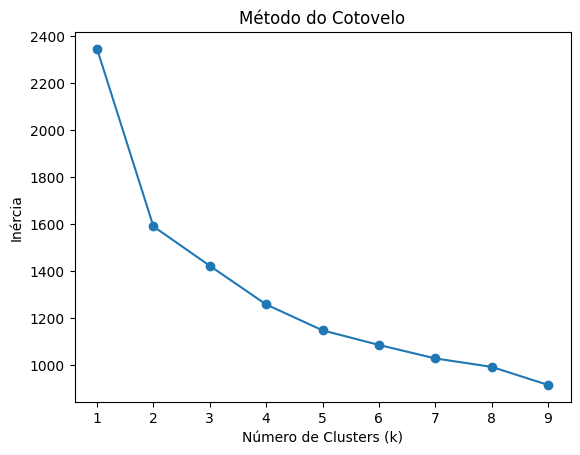

In [26]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [27]:
# Verificar se há algum NaN em X_scaled
tem_nan = np.isnan(X_scaled).any()

if tem_nan:
    print("X_scaled contém NaNs.")
else:
    print("X_scaled não contém NaNs.")

# Para ver a quantidade de NaNs por coluna:
nans_por_coluna = np.isnan(X_scaled).sum(axis=0)
print("Número de NaNs por coluna:", nans_por_coluna)

# Para ver a quantidade total de NaNs:
total_nans = np.isnan(X_scaled).sum()
print("Número total de NaNs:", total_nans)

X_scaled não contém NaNs.
Número de NaNs por coluna: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Número total de NaNs: 0


In [28]:
# Calcular as médias de cada cluster apenas para colunas numéricas
cluster_summary = Gol.groupby('Cluster').agg({col: 'mean' for col in Gol.select_dtypes(include=['number']).columns})
print(cluster_summary)

             Minutos         GA        SoTA       Saves     Saves%  \
Cluster                                                              
0        1114.914286  21.142857   57.171429   36.257143  65.494286   
1        2857.324324       38.0  124.918919   87.189189  71.691892   
2             2691.4      52.48       138.0       86.08     64.592   
3        1299.291667  15.291667       49.25   34.166667  71.158333   
4        3184.058824  47.352941  161.823529  114.823529  73.494118   

         Clean Sheet  Clean Sheet%       PSxG   PSxG+/-  Passes Att  \
Cluster                                                               
0                1.8     14.497143  19.534286 -1.151429  356.285714   
1           9.810811     30.489189  38.454054  1.724324       973.0   
2               5.04        16.484     47.172    -3.628      912.28   
3           5.708333     39.458333  15.504167  0.629167  432.291667   
4           8.941176     25.258824  51.141176  5.082353      1000.0   

         Pa

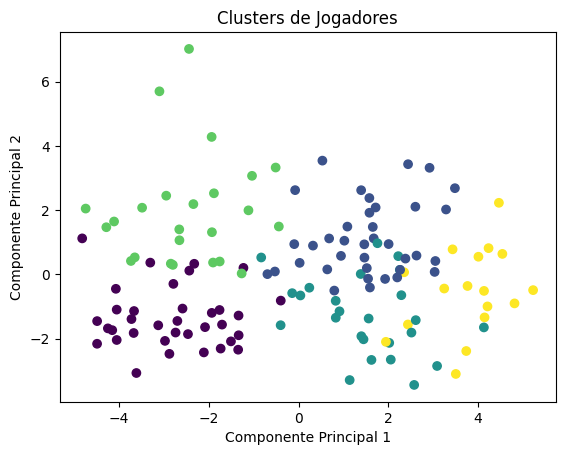

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [30]:
# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_columns = Gol.select_dtypes(include=np.number).columns
correlation_matrix = Gol[numeric_columns].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                  Minutos        GA      SoTA     Saves    Saves%  \
Minutos          1.000000  0.815542  0.904857  0.902329  0.281885   
GA               0.815542  1.000000  0.926616  0.848880 -0.062591   
SoTA             0.904857  0.926616  1.000000  0.984868  0.248503   
Saves            0.902329  0.848880  0.984868  1.000000  0.379099   
Saves%           0.281885 -0.062591  0.248503  0.379099  1.000000   
Clean Sheet      0.737822  0.304239  0.493354  0.555942  0.468367   
Clean Sheet%     0.111721 -0.290691 -0.123183 -0.041553  0.416952   
PSxG             0.851410  0.960129  0.972385  0.929429  0.119724   
PSxG+/-          0.176970 -0.086849  0.211372  0.335500  0.650105   
Passes Att       0.907112  0.753741  0.839357  0.837315  0.233698   
Passes Launch%   0.137165  0.263332  0.239598  0.215360  0.003307   
Passes AvgLen    0.191514  0.286516  0.279217  0.260652  0.046612   
Crosses Opp      0.920422  0.844115  0.933858  0.930155  0.282309   
Crosses Stp      0.720675  0.62822

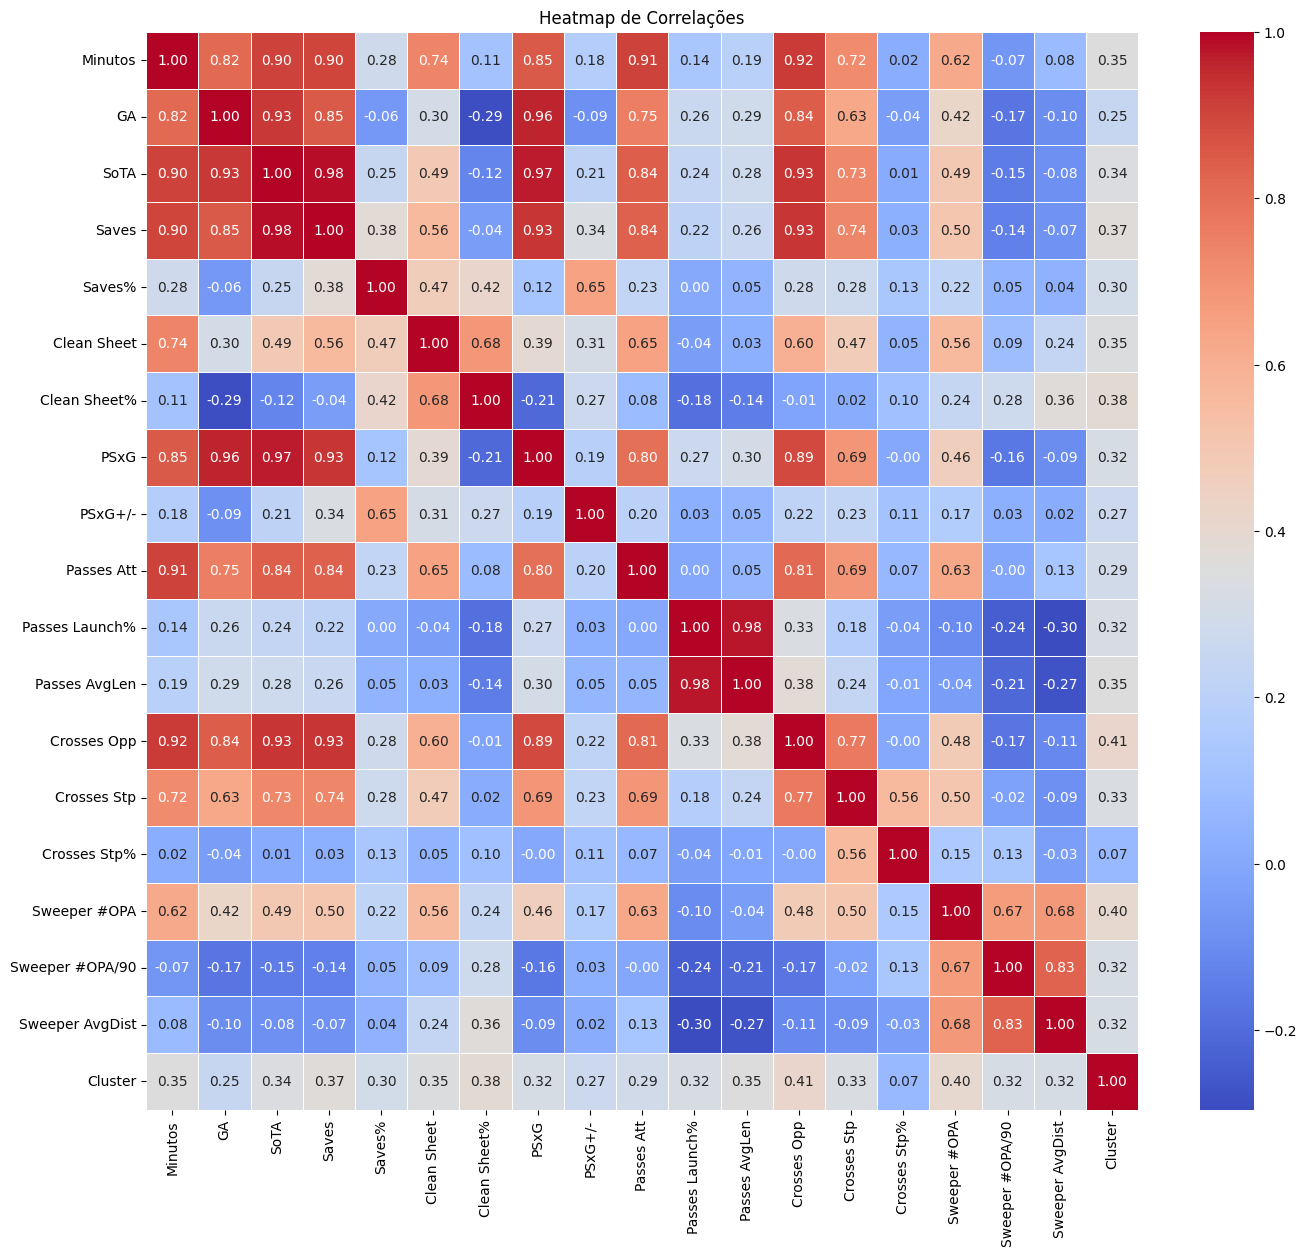

In [31]:
plt.figure(figsize=(16, 14))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlações')
plt.show()

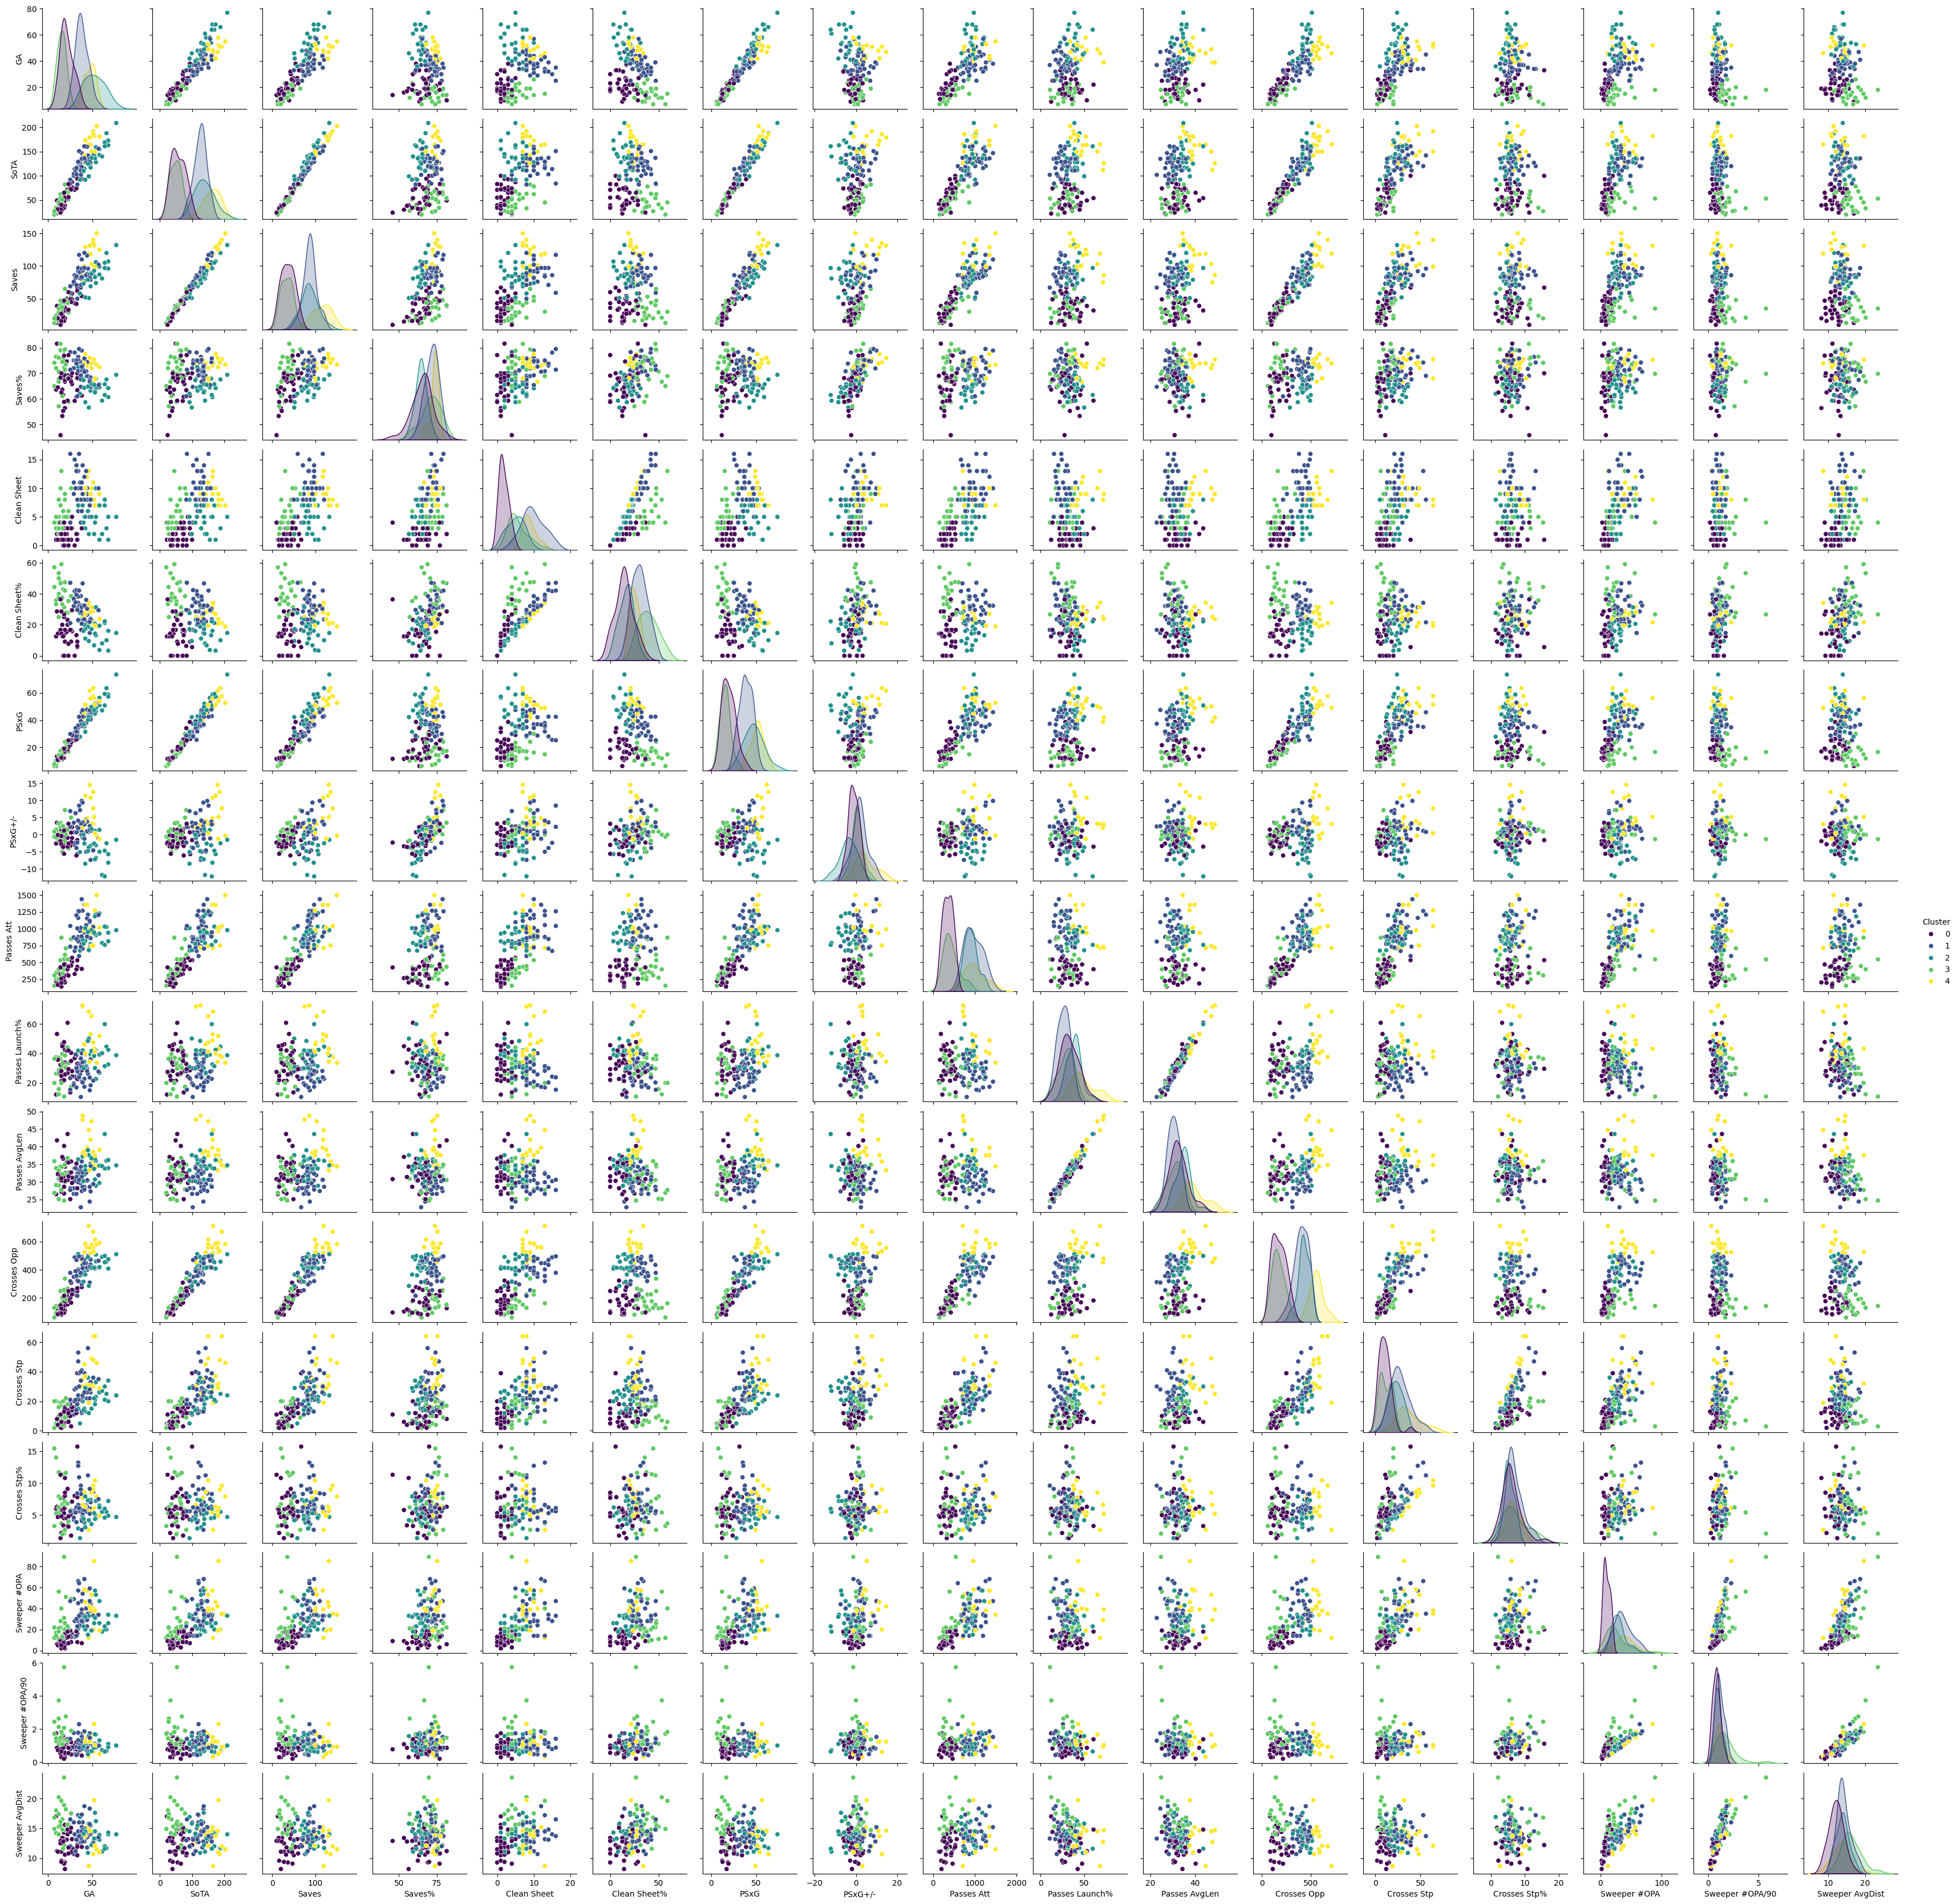

In [32]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(Gol[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()


### **Comportamento de Variáveis e Distribuição de Clusters para Goleiros**

---

### **1. Análise de Correlações com Insights**


A matriz de correlação revela como as variáveis técnicas, defensivas e de participação com os pés se relacionam entre si. Abaixo, os principais insights:

---

### 🧱 Correlações Fortes Positivas

* **Passes ↔ Passes Curtos / Passes Longos / Lançamentos**:
  🔁 Quanto mais o goleiro participa do jogo com os pés, maior o volume de todos os tipos de passes.

* **Defensive Actions Outside Box ↔ Avg. Distance of Defensive Actions**:
  🌐 Goleiros que saem mais da área também têm média de distância defensiva mais alta, mostrando maior proatividade.

* **PSxG+/- ↔ Save%**:
  🧤 Goleiros com alto desempenho ajustado por expectativa (PSxG+/-) tendem a ter maior taxa de defesas bem-sucedidas.

---

### 📉 Correlações Fortes Negativas

* **Save% ↔ Average Pass Length**:
  ⚖️ Goleiros com alta eficiência de defesa geralmente atuam com passes mais curtos — foco no jogo seguro.

* **Launch% ↔ Passes Curtos**:
  🔄 Quanto maior o número de lançamentos longos, menor a proporção de passes curtos — estilos distintos de jogo com os pés.

---

📌 **Conclusão:**
Os clusters identificam perfis diversos de goleiros: os mais tradicionais, os distribuidores com os pés, os proativos fora da área e os reservas. A combinação entre métricas de defesa e construção com os pés revela claramente os diferentes estilos e funções nas equipes modernas.

---


---

### **2. Perfis dos Clusters com Médias**


Os goleiros foram agrupados em **5 clusters** com base em métricas de defesas, envolvimento com os pés, ações defensivas fora da área e passes longos. A seguir, a descrição de cada grupo com base nas visualizações dos gráficos Pairplot e Heatmap.

---

### 🟣 Cluster 0 (Roxo escuro)

🚀 **Goleiros participativos e ofensivos**

* Altos valores em **Avg. Distance of Defensive Actions**, **Average Pass Length** e **Launch%**
* Se destacam também em **Passes Longos Completos** e **Ações Defensivas fora da Área**

📦 *Perfil de goleiros modernos*, que jogam adiantados, participam da construção com passes longos e cobrem a zaga em transições rápidas.

---

### 🟡 Cluster 1 (Amarelo)

🧱 **Goleiros defensivos e pouco ativos com os pés**

* Maiores médias em **Saves**, **Save%** e **PSxG+/-**
* Baixos índices de passes e participação com os pés

🧤 *Perfil de goleiros clássicos*, mais reativos, com excelente desempenho embaixo das traves. São decisivos em finalizações, mas têm menor envolvimento na construção.

---

### 🔵 Cluster 2 (Azul escuro)

⚖️ **Goleiros regulares e equilibrados**

* Médias consistentes em quase todas as métricas
* Bom desempenho tanto em defesas quanto em ações com os pés

⚙️ *Perfil de goleiros completos e consistentes*, com leitura equilibrada entre proteger o gol e contribuir na posse de bola.

---

### 🟦 Cluster 3 (Ciano)

⏳ **Baixa minutagem ou reservas**

* Valores reduzidos em praticamente todas as métricas
* Pouca representatividade ofensiva e defensiva

📉 *Grupo com pouco tempo de jogo*, composto possivelmente por goleiros reservas, lesionados ou que atuaram em poucas partidas.

---

### 🟢 Cluster 4 (Verde)

🎯 **Goleiros técnicos e eficientes nos passes**

* Destaque em **Passes Certos**, **Passes Longos Completos** e **Passes Curtos**
* Alta precisão, ainda que com menor volume de defesas

🧠 *Perfil de goleiros construtores*, com ótima saída de bola e precisão nos passes. Atuam como opção segura na primeira fase da construção ofensiva.

---






In [39]:
cluster_names = {
    0: 'goleiros modernos',
    1: 'goleiros classicos',
    2: 'goleiros solidos',
    3: 'goleiros sr',
    4: 'goleiros liberos'
}

# Adicionar nomes ao DataFrame
Gol['Perfil'] = Gol['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(Gol[['jogador', 'time', 'posicao', 'Minutos', 'GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist','Perfil']].head())

             jogador         time posicao  Minutos  GA  SoTA  Saves  Saves%  Clean Sheet  Clean Sheet%  PSxG  PSxG+/-  Passes Att  Passes Launch%  Passes AvgLen  Crosses Opp  Crosses Stp  Crosses Stp%  Sweeper #OPA  Sweeper #OPA/90  Sweeper AvgDist              Perfil
0         David Raya      Arsenal      GK     3420  34   120     86    74.2           13          34.2  35.1      1.1        1263            29.9           29.9          402           53          13.2            66             1.74             17.2  goleiros classicos
1  Emiliano Martínez  Aston Villa      GK     3194  45   142     96    69.0            8          21.6  45.8      0.8        1208            26.3           30.4          498           56          11.2            35             0.99             13.7  goleiros classicos
3  Kepa Arrizabalaga  Bournemouth      GK     2790  39   134     95    73.9            8          25.8  41.0      2.0         831            33.2           32.9          367           22       

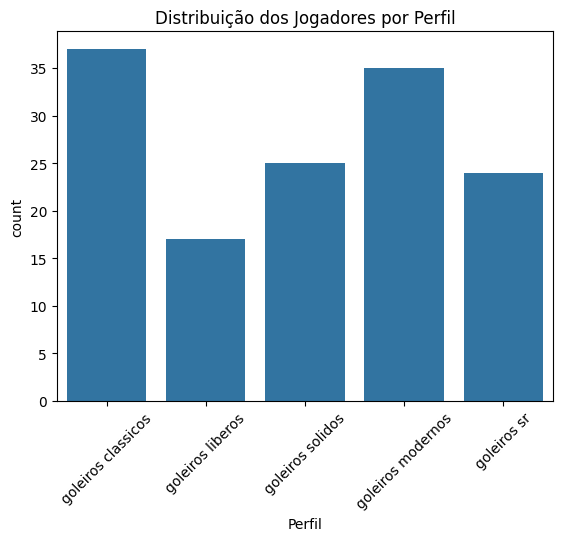

In [40]:
sns.countplot(data=Gol, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()


In [41]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = Gol[Gol['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador', 'time', 'posicao', 'Minutos', 'GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "goleiros solidos"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)



Jogadores no perfil: goleiros solidos
                jogador            time posicao  Minutos  GA  SoTA  Saves  Saves%  Clean Sheet  Clean Sheet%  PSxG  PSxG+/-  Passes Att  Passes Launch%  Passes AvgLen  Crosses Opp  Crosses Stp  Crosses Stp%  Sweeper #OPA  Sweeper #OPA/90  Sweeper AvgDist
8       Bart Verbruggen        Brighton      GK     3240  58   143     87    65.7            7          19.4  51.0     -5.0        1226            26.9           29.7          414           27           6.5            47             1.31             13.9
14           Bernd Leno          Fulham      GK     3420  54   159    106    67.9            5          13.2  48.9     -3.1        1231            22.7           28.9          507           23           4.5            33             0.87             13.3
20       Mads Hermansen  Leicester City      GK     2385  58   155     99    64.5            1           3.7  56.4      1.4         926            39.2           34.6          419           26    

In [42]:
# Dicionário dos peso para cada métrica
pesos = {
    'GA': -5,
    'Saves': 2,
    'Clean Sheet': 10,
    'PSxG': 5,
    'Passes Launch%': 3,
    'Crosses Stp%': 5,
    'Sweeper #OPA' : 5,
}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    return coluna / coluna.max()

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    Gol[coluna + '_Pontuacao'] = Gol[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
Gol['Pontuacao_Total'] = Gol[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = Gol['Pontuacao_Total'].min()
max_pontuacao = Gol['Pontuacao_Total'].max()
Gol['Pontuacao'] = (
    (Gol['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'goleiros liberos'
jogadores_filtrados = Gol[Gol['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: goleiros liberos
 Ranking            time posicao                jogador           Perfil  Pontuacao
       1         Osasuna      GK         Sergio Herrera goleiros liberos      100.0
       2         Everton      GK        Jordan Pickford goleiros liberos  86.581818
       3         Leganés      GK        Marko Dmitrović goleiros liberos  83.915152
       4          Torino      GK Vanja Milinković-Savić goleiros liberos  80.412121
       5        Mainz 05      GK          Robin Zentner goleiros liberos  79.818182
       6           Reims      GK          Yehvann Diouf goleiros liberos  75.527273
       7         Auxerre      GK           Donovan Léon goleiros liberos   75.50303
       8        Espanyol      GK            Joan García goleiros liberos  73.478788
       9          Getafe      GK            David Soria goleiros liberos  71.842424
      10  Crystal Palace      GK         Dean Henderson goleiros liberos  67.769697
      11       Brentford  

In [43]:
4# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'goleiros modernos'  # Defina o perfil desejado
jogadores_filtrados = Gol[Gol['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))


Jogadores disponíveis no perfil 'goleiros modernos': ['Alex Palmer', 'Arijanet Muric', 'Christian Walton', 'Jakub Stolarczyk', 'Stefan Ortega', 'Fraser Forster', 'Łukasz Fabiański', 'Sam Johnstone', 'Marc-André ter Stegen', 'Adrián', 'Dinko Horkaš', 'Leo Román', 'Diego Conde', 'Arthur Desmas', 'Mathieu Gorgelin', 'Radosław Majecki', 'Alban Lafont', 'Anthony Lopes', 'Gianluigi Donnarumma', 'Brice Samba', 'Nediljko Labrović', 'Timo Horn', 'Florian Müller', 'Jonas Omlin', 'Thomas Dähne', 'Federico Ravaglia', 'Alen Sherri', 'Simone Scuffet', 'Emil Audero', 'Pepe Reina', 'Pierluigi Gollini', 'Semuel Pizzignacco', 'Filip Stankovic', 'Ionuț Radu', 'Jesse Joronen']
Digite o nome do jogador (ou 'sair' para finalizar): sair

Ranking de jogadores por eficiência de valor:
 Ranking               jogador  Valor de Mercado (€M)  Pontuacao  Custo por Ponto (€M)  Score de Valor
       1           Alex Palmer                    NaN  18.642424                  <NA>            <NA>
       2        Arijane


Jogadores selecionados: David Raya, Joan García, Sergio Herrera, Gianluigi Donnarumma
     Minutos  GA  SoTA  Saves  Saves%  Clean Sheet  Clean Sheet%  PSxG  PSxG+/-  Passes Att  Passes Launch%  Passes AvgLen  Crosses Opp  Crosses Stp  Crosses Stp%  Sweeper #OPA  Sweeper #OPA/90  Sweeper AvgDist
0       3420  34   120     86    74.2           13          34.2  35.1      1.1        1263            29.9           29.9          402           53          13.2            66             1.74             17.2
60      3420  51   192    140    75.5            8          21.1  57.7      7.7        1040            37.6           34.8          670           64           9.6            35             0.92             12.0
72      3330  52   182    131    75.3            8          21.6  56.2      5.2         966            43.2           37.6          524           32           6.1            85              2.3             19.7
113     2091  25    74     49    67.6            4          16.7  21.

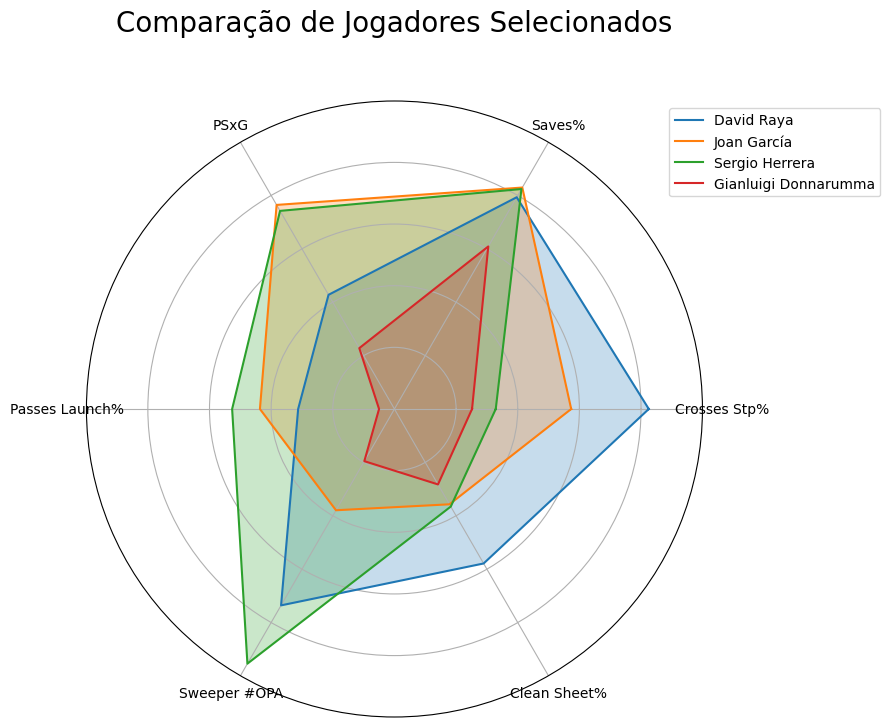

In [44]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['Minutos', 'GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist',]])

    # Definir as métricas a serem exibidas no radar
    metricas = ['Crosses Stp%', 'Saves%', 'PSxG', 'Passes Launch%','Sweeper #OPA','Clean Sheet%',]
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['David Raya', 'Gianluigi Donnarumma','Sergio Herrera','Joan García','']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, Gol)